## Packages

In [3]:
%pip install arch
%pip install scikit-learn
%pip install yfinance
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\heber\appdata\local\programs\python\python311\lib\site-packages (1.3.1)




[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Loading the data

In [5]:
raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", 
                              end = "2023-09-23", interval = "1d", group_by = 'ticker', auto_adjust = True, threads = True)

[*********************100%%**********************]  4 of 4 completed


In [6]:
df_comp = raw_data.copy()

In [7]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [8]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

## Creating Returns

In [9]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_dax'] = df_comp.dax.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1).mul(100)

In [10]:
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp.ret_ftse[1])*100
df_comp['norm_ret_dax'] = df_comp.ret_dax.div(df_comp.ret_dax[1])*100
df_comp['norm_ret_nikkei'] = df_comp.ret_nikkei.div(df_comp.ret_nikkei[1])*100

## Splitting the Data

In [11]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## Fitting a Model

In [14]:
model_ar = ARIMA(df.ftse, order = (1,0,0))
results_ar = model_ar.fit()

## Simple Forecasting

In [15]:
df.tail()

,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei,norm_ret_spx,norm_ret_ftse,norm_ret_dax,norm_ret_nikkei
,,,,,,,,,,,,
Date,,,,,,,,,,,,
2017-10-09,2544.729980,12976.400391,7507.899902,20690.710938,-0.180443,-0.199391,0.157920,0.000000,75.228529,25.597915,113.341903,0.000000
2017-10-10,2550.639893,12949.250000,7538.299805,20823.509766,0.232241,0.404906,-0.209229,0.641828,-96.823528,-51.981921,-150.167685,283.122833
2017-10-11,2555.239990,12970.679688,7533.799805,20881.269531,0.180351,-0.059695,0.165490,0.277378,-75.189897,7.663686,118.775225,122.356644
2017-10-12,2550.929932,12982.889648,7556.200195,20954.720703,-0.168675,0.297332,0.094135,0.351756,70.322300,-38.171579,67.562573,155.166476
2017-10-13,2553.169922,12991.870117,7535.399902,21155.179688,0.087811,-0.275275,0.069172,0.956629,-36.609111,35.339842,49.645773,421.987625


In [38]:
# create variables that will help us change the periods easily instead of typing them up every time
# make sure the start and end dates are business days, otherwise the code will result in an error
start_date = "2017-10-14"
#end_date = "2015-01-01"

In [46]:
end_date = "2023-09-22"
df_pred = results_ar.predict(start = start_date, end = end_date)

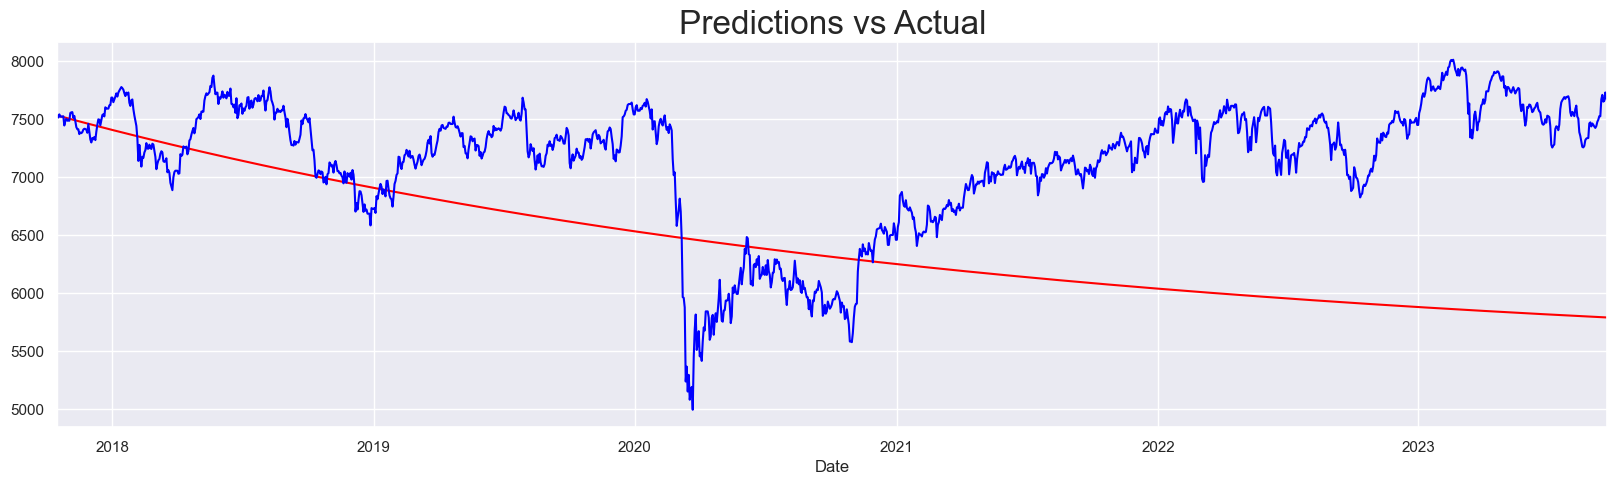

In [47]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

### Using Returns Instead

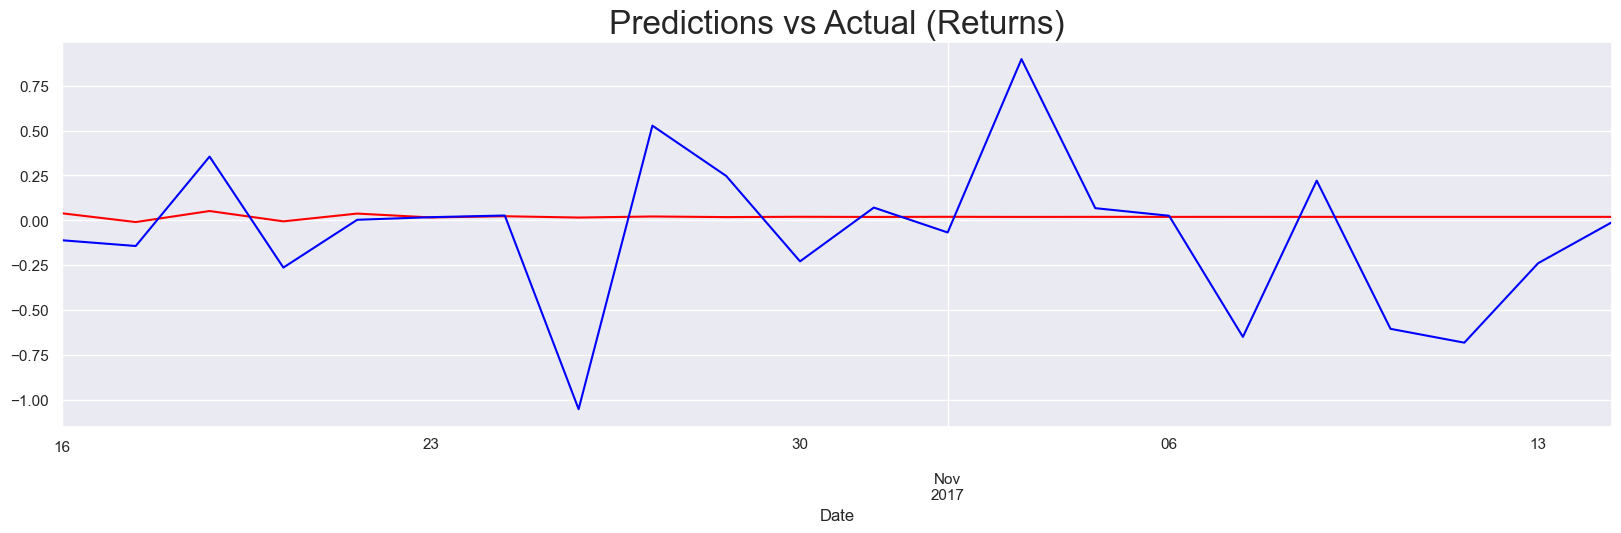

In [50]:
end_date = "2017-11-14"

model_ret_ar = ARIMA(df.ret_ftse[1:], order = (5,0,0))
results_ret_ar = model_ret_ar.fit()

df_pred_ar = results_ret_ar.predict(start = start_date, end = end_date) 

df_pred_ar[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [51]:
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 6199
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -9477.100
Date:                Tue, 10 Oct 2023   AIC                          18968.200
Time:                        01:31:20   BIC                          19015.325
Sample:                    01-11-1994   HQIC                         18984.539
                         - 10-13-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.481      0.139      -0.006       0.044
ar.L1         -0.0179      0.008     -2.235      0.025      -0.034      -0.002
ar.L2         -0.0522      0.007     -7.340      0.000      -0.066      -0.038
ar.L3         -0.0698      0.007     -9.809      0.000      -0.084      -0.056
ar.L4          0.0290      0.007      3.930      0.000       0.015       0.043
ar.L5         -0.0577      0.007     -8.092      0.000      -0.072      -0.044
sigma2         1.2457      0.012    104.116      0.000       1.222       1.269
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              8485.94
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.16
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### MA

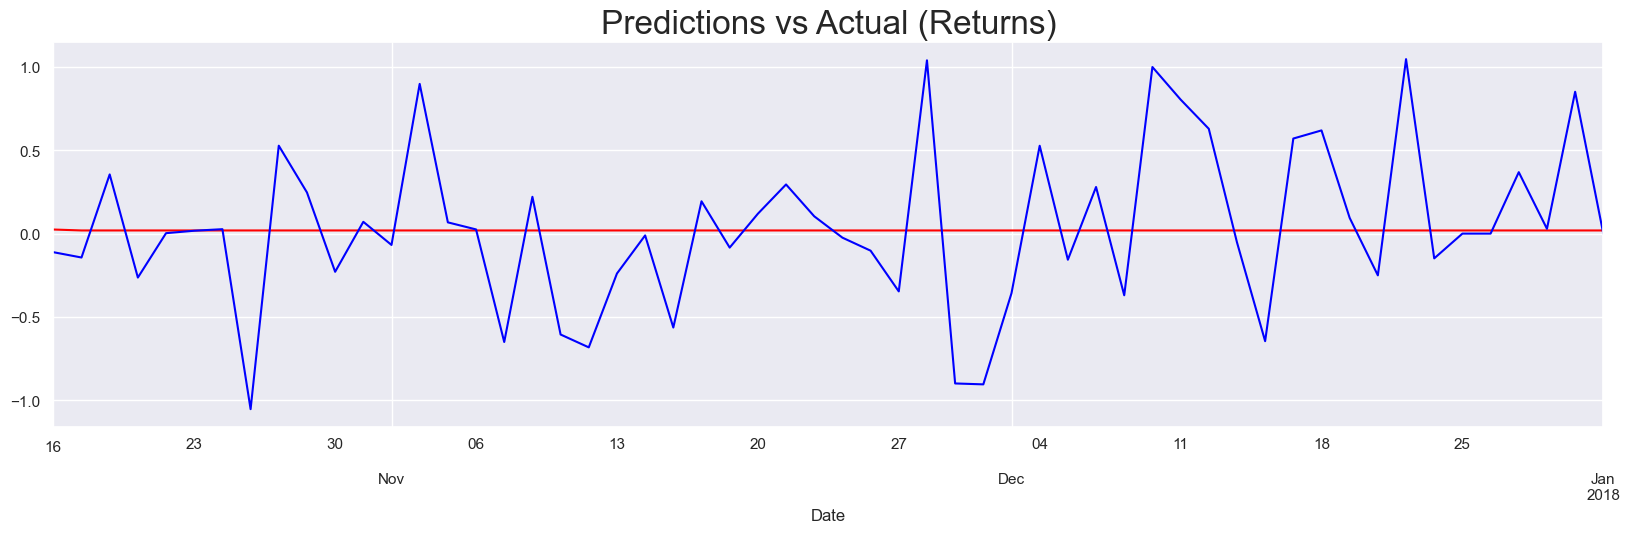

In [52]:
end_date = "2018-01-01"

model_ret_ma = ARIMA(df.ret_ftse[1:], order=(0,0,1))
results_ret_ma = model_ret_ma.fit()

df_pred_ma = results_ret_ma.predict(start = start_date, end = end_date) 

df_pred_ma[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [53]:
df_pred_ma.head()

2017-10-16    0.024583
2017-10-17    0.018950
2017-10-18    0.018950
2017-10-19    0.018950
2017-10-20    0.018950
Freq: B, Name: predicted_mean, dtype: float64

### ARMA

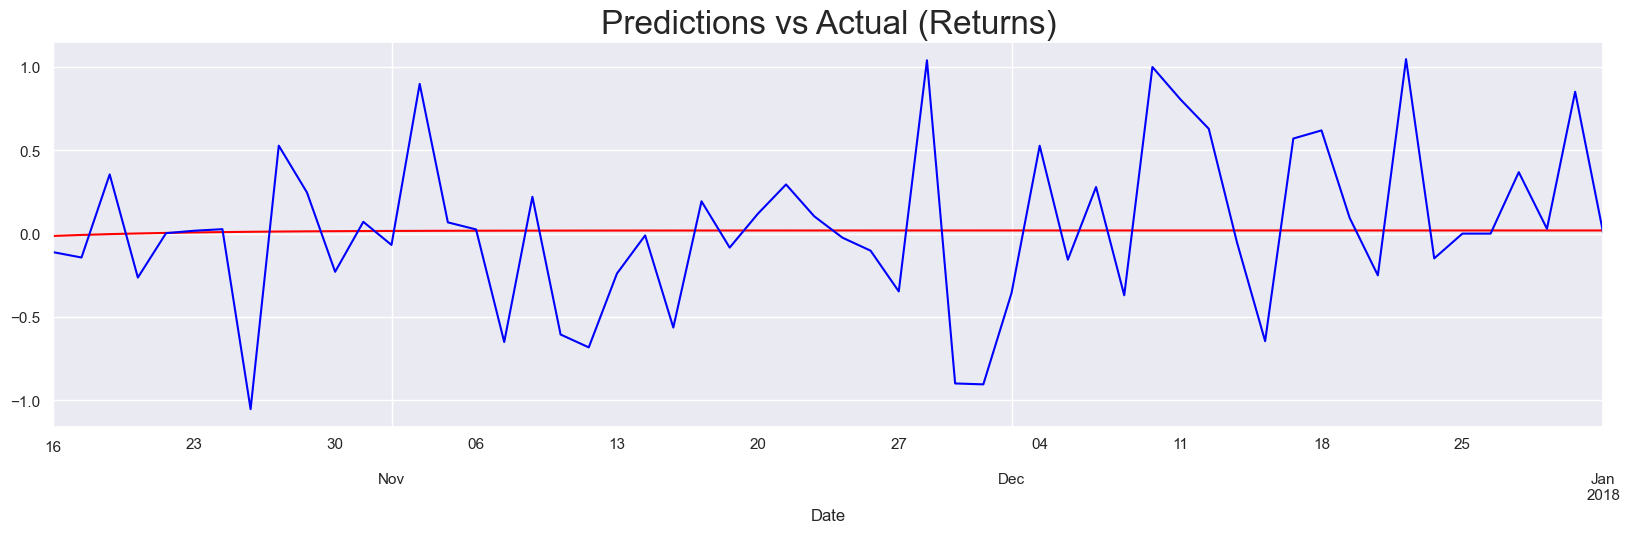

In [54]:
model_ret_arma = ARIMA(df.ret_ftse[1:], order=(1,0,1))
results_ret_arma = model_ret_arma.fit()

df_pred_arma = results_ret_arma.predict(start = start_date, end = end_date)

df_pred_arma[start_date:end_date].plot(figsize = (20,5), color = "red")   
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

In [55]:
df_pred_arma.head()

2017-10-16   -0.013966
2017-10-17   -0.007958
2017-10-18   -0.003047
2017-10-19    0.000967
2017-10-20    0.004249
Freq: B, Name: predicted_mean, dtype: float64

In [56]:
df_pred_arma.tail()

2017-12-26    0.018942
2017-12-27    0.018943
2017-12-28    0.018943
2017-12-29    0.018943
2018-01-01    0.018943
Freq: B, Name: predicted_mean, dtype: float64

### ARMAX

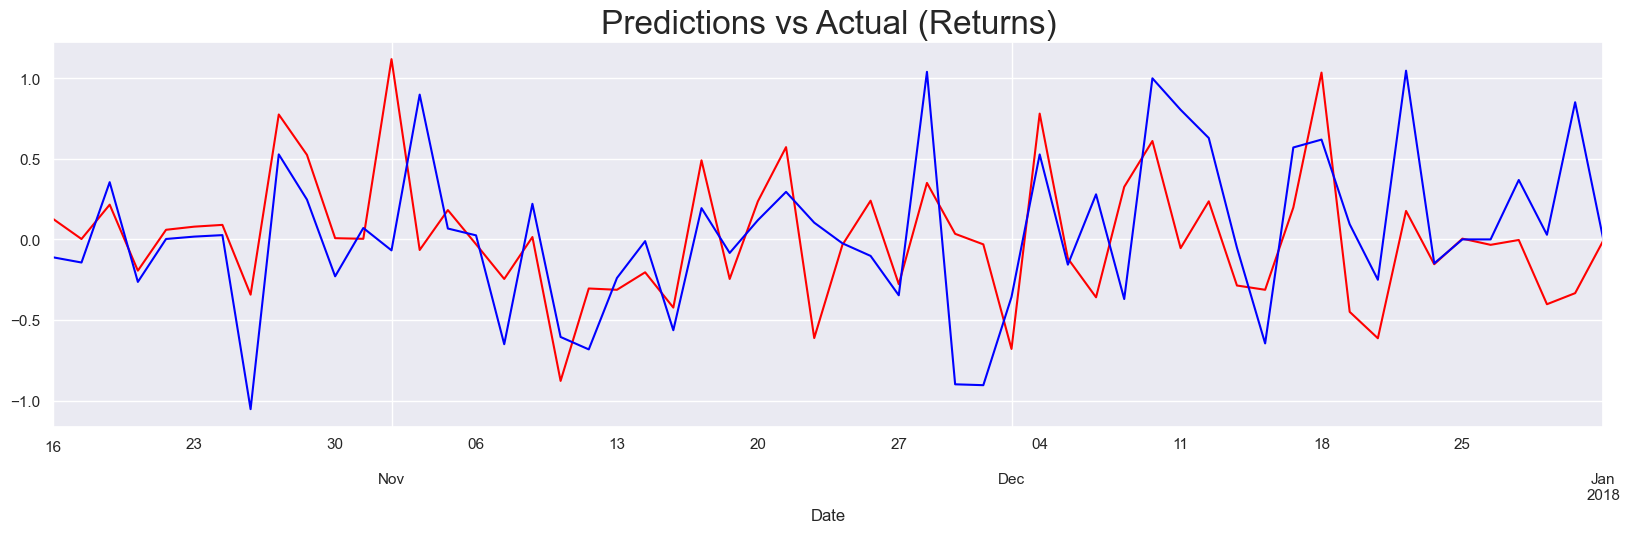

In [57]:
model_ret_armax = ARIMA(df.ret_ftse[1:], exog = df[["ret_spx","ret_dax","ret_nikkei"]][1:], order = (1,0,1))
results_ret_armax = model_ret_armax.fit()

df_pred_armax = results_ret_armax.predict(start = start_date, end = end_date, 
                                          exog = df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date]) 

df_pred_armax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (Returns)", size = 24)
plt.show()

### SARMA

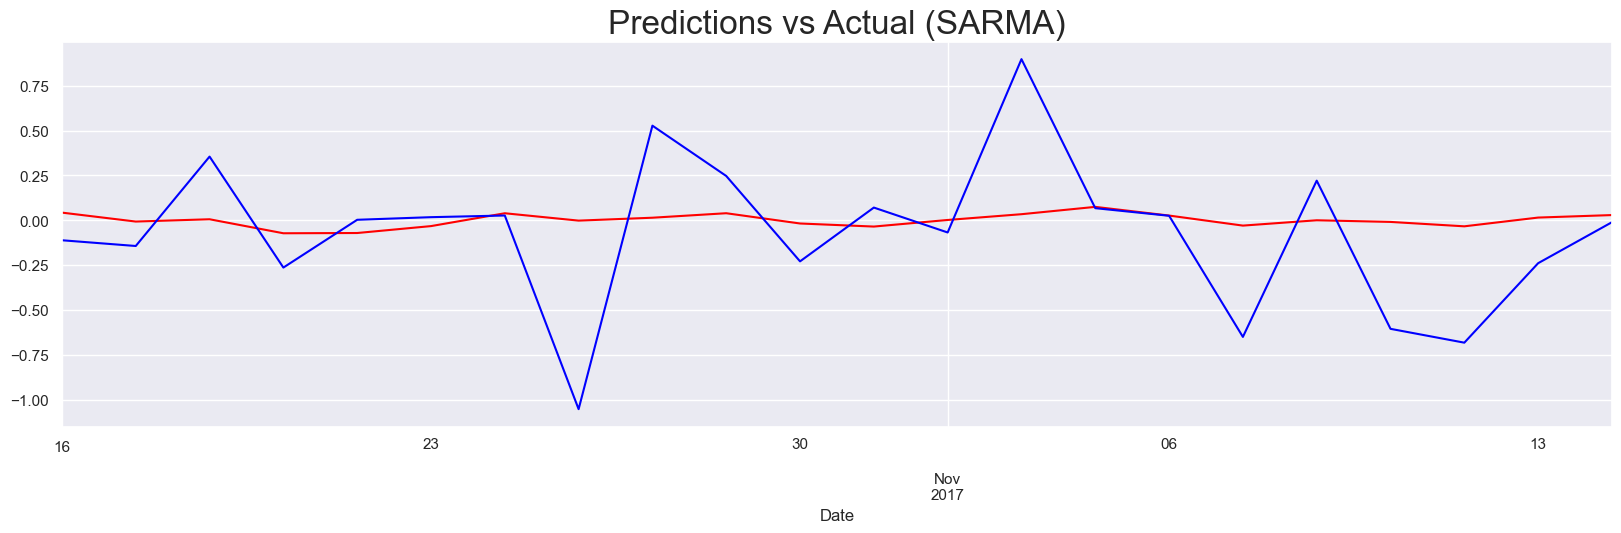

In [58]:
end_date = "2017-11-14"
model_ret_sarma = SARIMAX(df.ret_ftse[1:], order = (3,0,4), seasonal_order = (3,0,2,5))
results_ret_sarma = model_ret_sarma.fit()

df_pred_sarma = results_ret_sarma.predict(start = start_date, end = end_date)

df_pred_sarma[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual (SARMA)", size = 24)
plt.show()

### SARIMAX

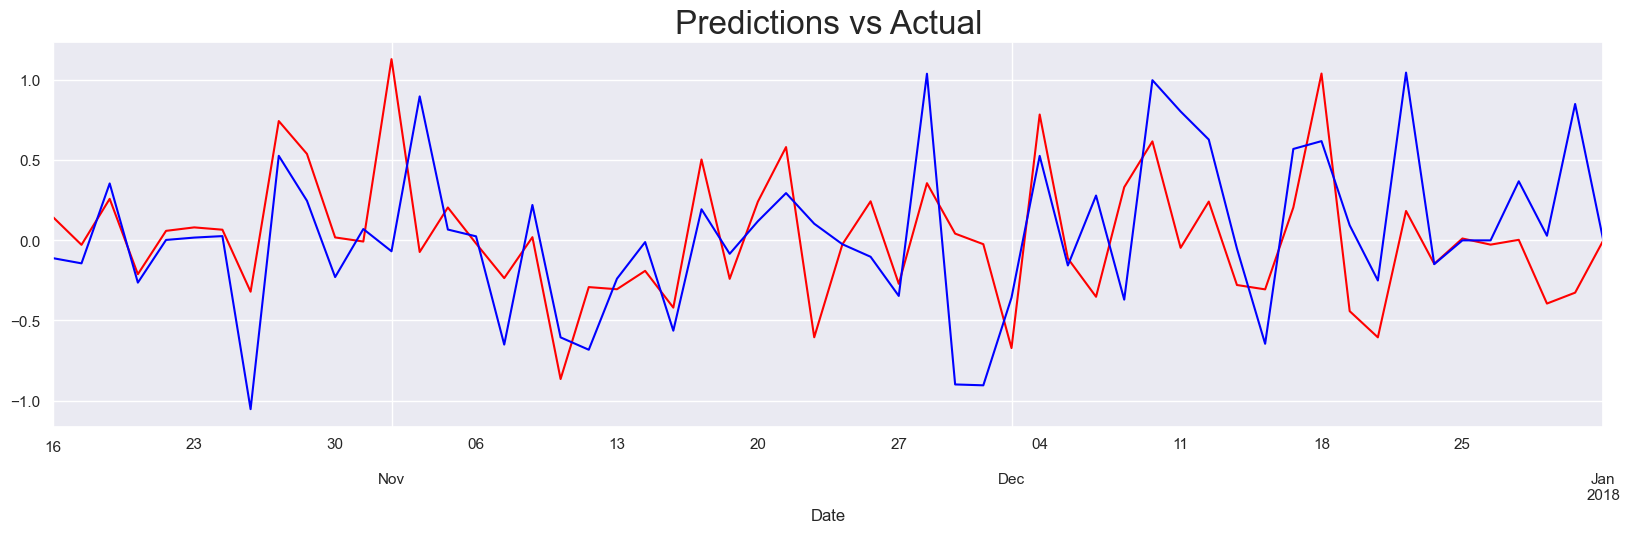

In [59]:
end_date = "2018-01-01"
model_ret_sarimax = SARIMAX(df.ret_ftse[1:], exog = df[["ret_spx","ret_dax","ret_nikkei"]][1:], 
                            order = (3,0,4), seasonal_order = (3,0,2,5))
results_ret_sarimax = model_ret_sarimax.fit()

df_pred_sarimax = results_ret_sarimax.predict(start = start_date, end = end_date, 
                                              exog = df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date]) 

df_pred_sarimax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

### Auto ARIMA

In [60]:
model_auto = auto_arima(df.ret_ftse[1:], exogenous = df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
                       m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)

In [63]:
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test[start_date:end_date]),
                            exogenous = df_test[['ret_spx', 'ret_dax', 'ret_nikkei']][start_date:end_date]),
                            index = df_test[start_date:end_date].index)

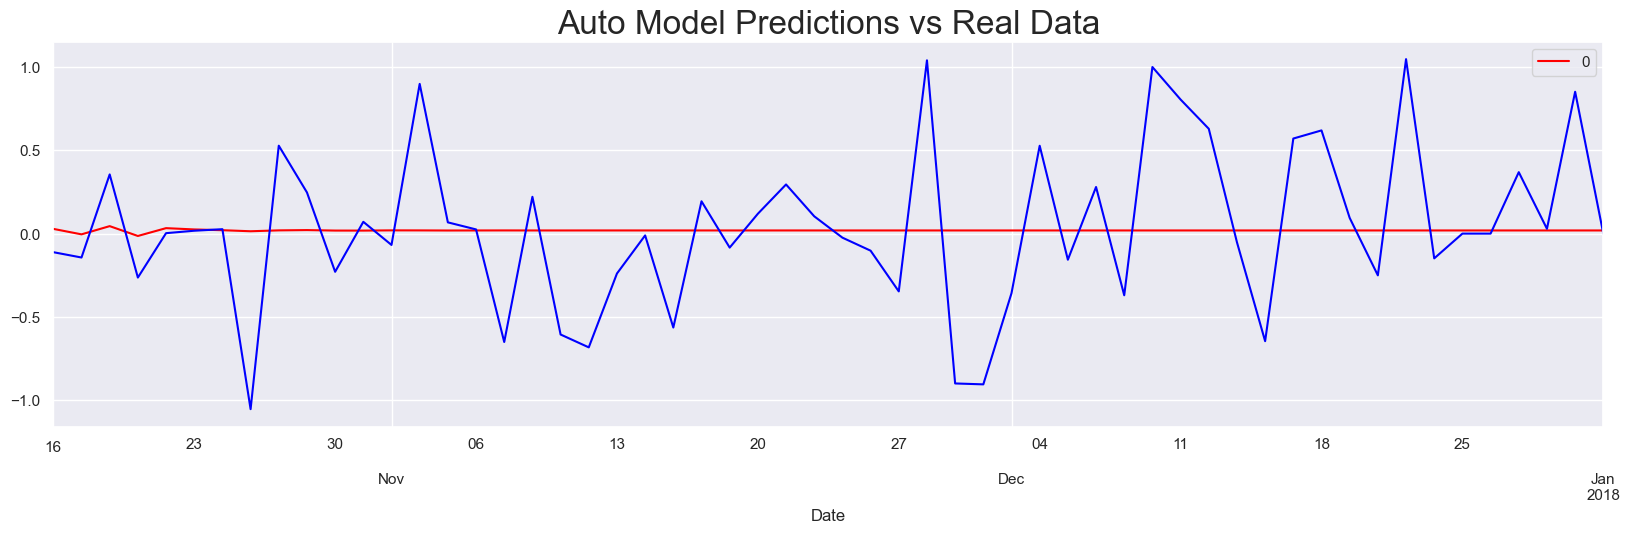

In [64]:
df_auto_pred.plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

### Comparing All the Models (Returns)

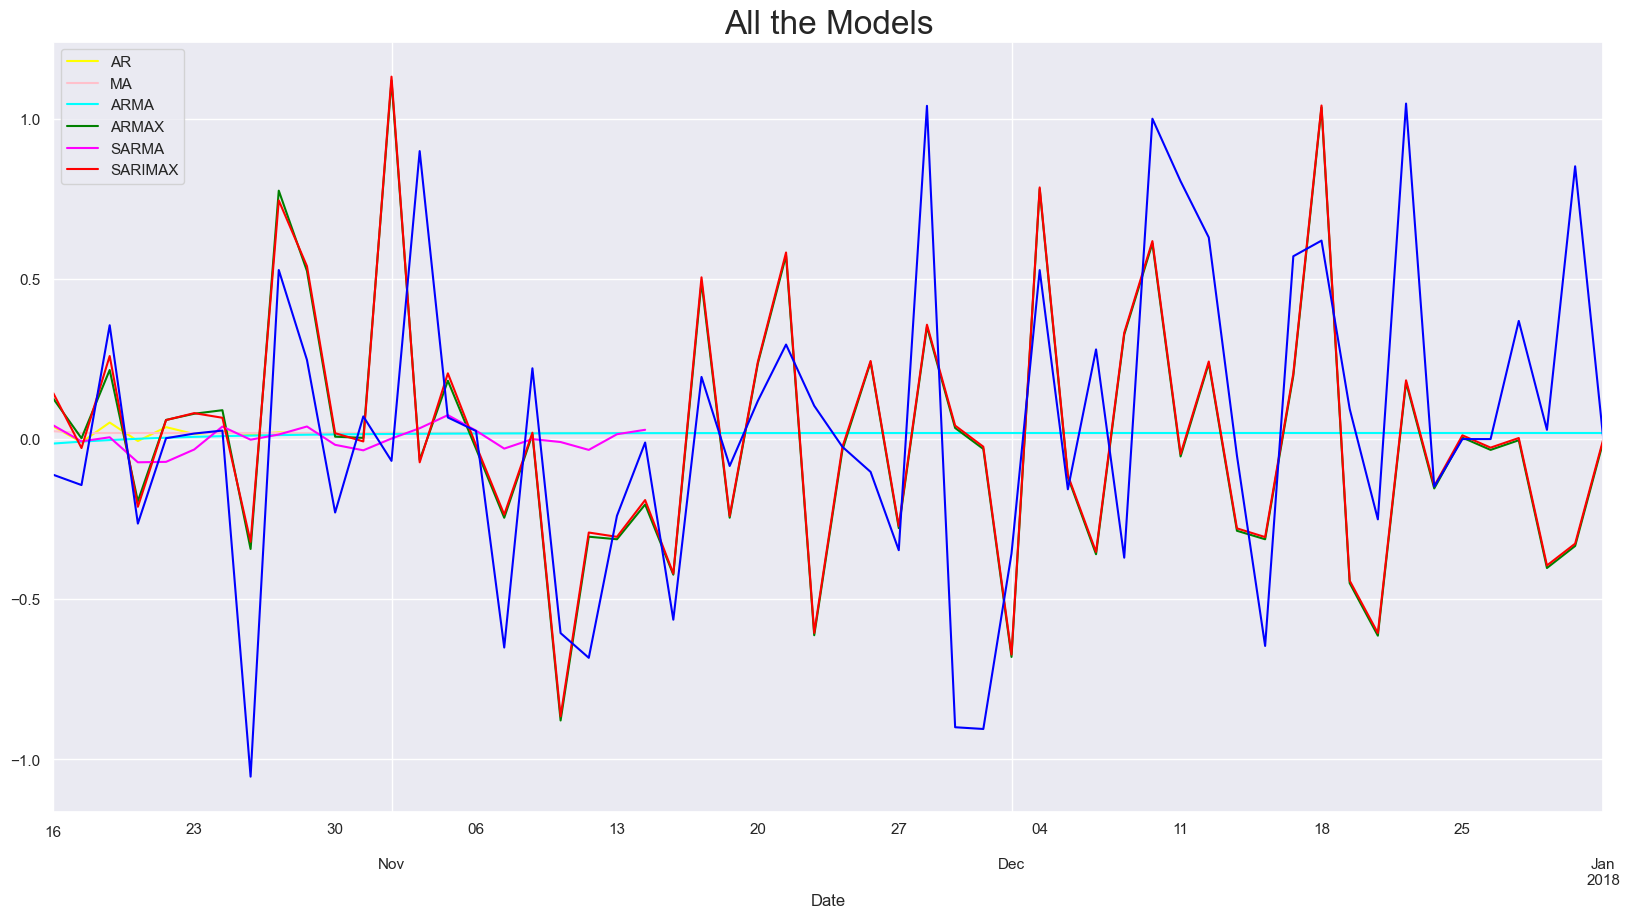

In [66]:
end_date = "2018-01-01"
df_pred_ar[start_date:end_date].plot(figsize = (20,10), color = "yellow")
df_pred_ma[start_date:end_date].plot(color = "pink")
df_pred_arma[start_date:end_date].plot(color = "cyan")
df_pred_armax[start_date:end_date].plot(color = "green")
df_pred_sarma[start_date:end_date].plot(color = "magenta")
df_pred_sarimax[start_date:end_date].plot(color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.legend(['AR','MA','ARMA','ARMAX','SARMA','SARIMAX'])
plt.title("All the Models", size = 24)
plt.show()

### Forecasting Volatility

In [67]:
mod_garch = arch_model(df_comp.ret_ftse[1:], vol = "GARCH", p = 1, q = 1, mean = "constant", dist = "Normal")
res_garch = mod_garch.fit(last_obs = start_date, update_freq = 10)

Iteration:     10,   Func. Count:     65,   Neg. LLF: 8357.098470133351
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8357.098470133351
            Iterations: 11
            Function evaluations: 69
            Gradient evaluations: 11


In [68]:
pred_garch = res_garch.forecast(horizon = 1, align = 'target') #predicción un paso hacia adelante utilizando un modelo GARCH

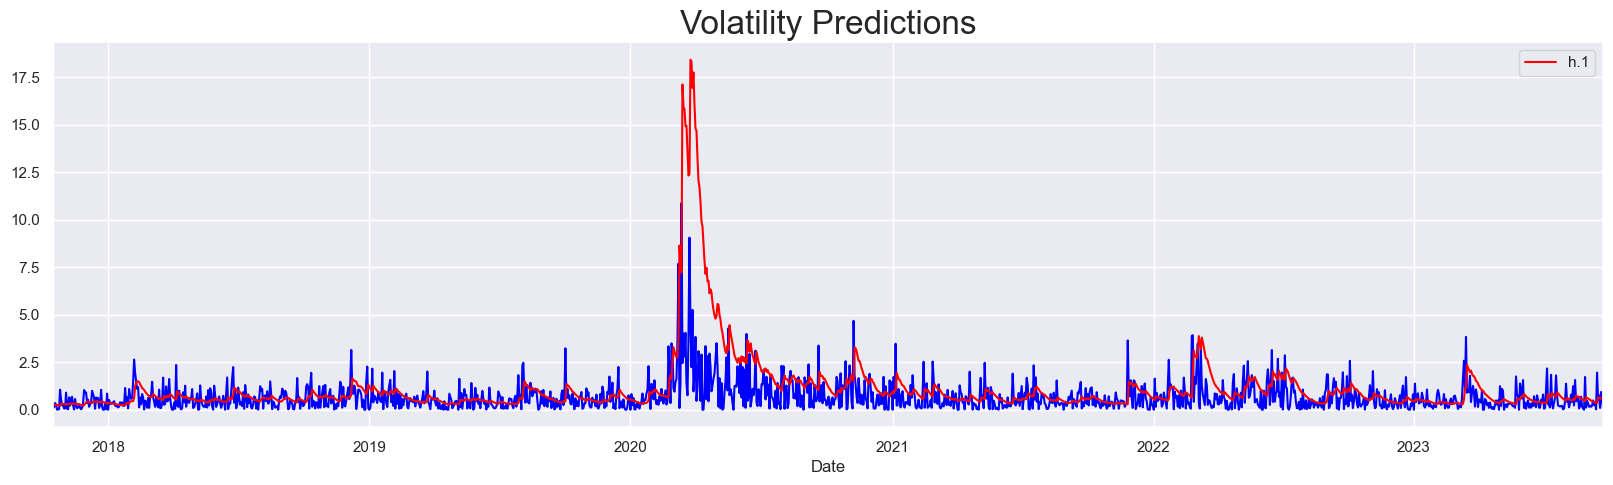

In [69]:
#Trazar la varianza residual pronosticada (también conocida como volatilidad condicional) de un modelo GARCH. 
pred_garch.residual_variance[start_date:].plot(figsize = (20,5), color = "red", zorder = 2)
df_test.ret_ftse.abs().plot(color = "blue", zorder = 1)
plt.title("Volatility Predictions", size = 24)
plt.show()

In [70]:
pred_garch = res_garch.forecast(horizon = 100, align = 'target')
pred_garch.residual_variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-22,0.604676,0.611065,0.592204,0.646617,0.644593,0.682466,0.403974,0.43472,0.455582,0.485552,...,0.889355,0.90014,0.907144,0.914933,0.926036,0.937563,0.951138,0.962841,0.977395,0.994628


### Multvariate Regression Model

In [71]:
from statsmodels.tsa.api import VAR

In [72]:
df_ret = df[['ret_spx', 'ret_dax', 'ret_ftse', 'ret_nikkei']][1:]

In [73]:
model_var_ret = VAR(df_ret)
model_var_ret.select_order(20) #20 indica que el método considerará órdenes hasta 20 variables rezagadas en el modelo VAR
results_var_ret = model_var_ret.fit(ic = 'aic')

In [74]:
results_var_ret.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 10, Oct, 2023
Time:                     01:54:30
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   0.115044
Nobs:                     6194.00    HQIC:                 0.0554077
Log likelihood:          -35145.2    FPE:                    1.02404
AIC:                    0.0237574    Det(Omega_mle):         1.01027
--------------------------------------------------------------------
Results for equation ret_spx
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.039269         0.014429            2.722           0.006
L1.ret_spx           -0.107772         0.016282           -6.619           0.000
L1.ret_dax            0.058529         0.017317           

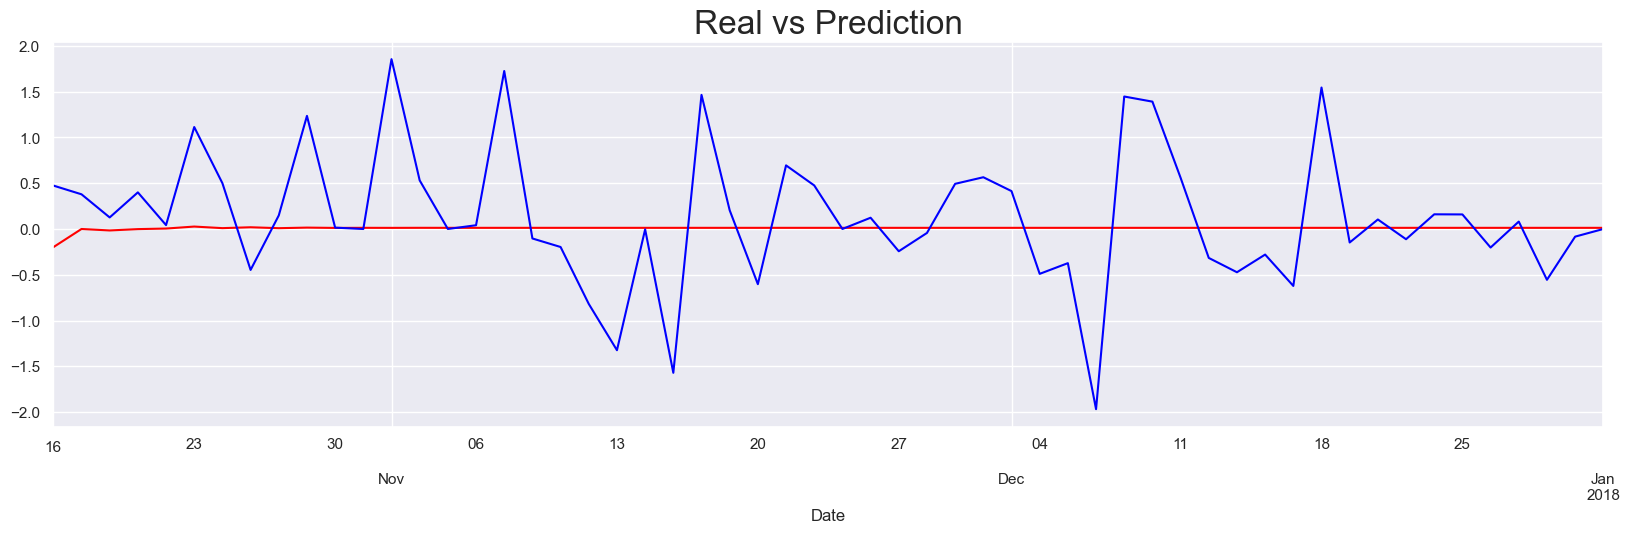

In [75]:
lag_order_ret = results_var_ret.k_ar
var_pred_ret = results_var_ret.forecast(df_ret.values[-lag_order_ret:], len(df_test[start_date:end_date]))

df_ret_pred = pd.DataFrame(data = var_pred_ret, index = df_test[start_date:end_date].index,
                                columns = df_test[start_date:end_date].columns[4:8])

df_ret_pred.ret_nikkei[start_date:end_date].plot(figsize = (20,5), color = "red")

df_test.ret_nikkei[start_date:end_date].plot(color = "blue")
plt.title("Real vs Prediction", size = 24)
plt.show()

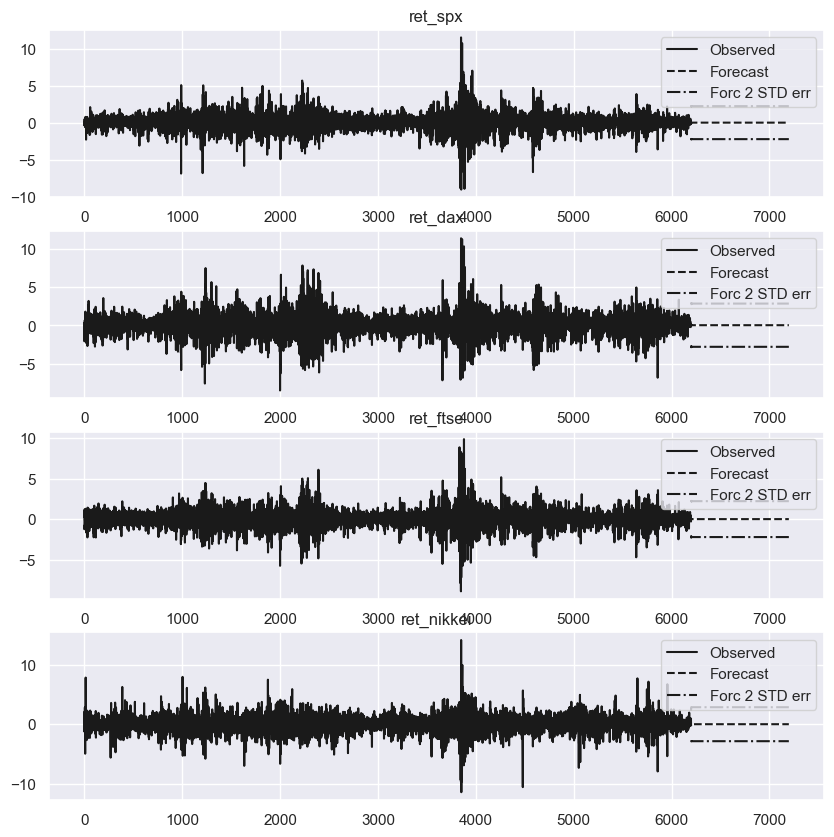

In [76]:
results_var_ret.plot_forecast(1000)
plt.show()